The English Premier League data is contained in a CSV file named `EPL.csv`.

The dataset contains the following columns.

- `Season`: Season year(s)
- `Pos`: final position that season
- `Team`: name of team 
- `Pld`: Number of matches played 
- `W`: Number of wins
- `D`: Number of draws
- `L`: Number of losses
- `GF`: Goals scored that season
- `GA`: Goals conceded that seasom
- `GD`: Difference in goals scored vs. conceded
- `Pts`: Total points at end of season
- `Qualification or Relegation`: result at end of season


Relegated = לרדת ליגה

### Packages

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

### Functions

In [7]:
def update_result(result):
    if 'Champions League' in result:
        result = 'Champions League'
    elif ('Europa' in result) or ('UEFA' in result):
        result = 'Europa'
    elif 'Relegation' in result:
        result = 'Relegated'
    else:
        result = '-'
    return result

In [8]:
epl = pd.read_csv("EPL.csv")
epl.info()
epl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


### Make Qualification less wordy

In [9]:
epl_condensed = epl[['Season','Team','Pos','Pts','GF','GD', 'Qualification or relegation']]

epl_condensed.rename(columns = {'Qualification or relegation':'Result'},inplace = True)
epl_condensed['Result'] = epl_condensed['Result'].apply(update_result)

epl_condensed['Result'].value_counts()

-                   220
Champions League     89
Europa               68
Relegated            63
Name: Result, dtype: int64

### Champions League Analysis

In [10]:
cl_qual = epl_condensed[epl_condensed.Result == 'Champions League']

cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
cl_qual_stats
#it takes 65-70 points to qualify, mostly 4th place. 

,Pos,Pts,GD
Season,,,
2000-01,3,69,25
2001-02,4,71,22
2002-03,4,67,15
2003-04,4,60,18
2004-05,5,58,-1
2005-06,4,67,32
2006-07,4,68,28
2007-08,4,76,39
2008-09,4,72,31


In [11]:
Eu_qual = epl_condensed[epl_condensed.Result == 'Europa']

Eu_qual_stats = Eu_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
Eu_qual_stats

,Pos,Pts,GD
Season,,,
2000-01,6,61,15
2001-02,18,36,-23
2002-03,9,51,-7
2003-04,11,48,-8
2004-05,7,55,5
2005-06,9,55,-3
2006-07,7,56,-5
2007-08,11,46,-8
2008-09,7,53,5


Some observations about this data:
- Most of the time 70+ Pts will qualify you for the Champions League, however not always.
- Usually, it takes around 55 Pts to qualify for the Europa league.
- GD isn't a great predictor of which competition a team will qualify for as there is such a wide range, but the Eu does have a lot of minuses while Cl have a lot of pluses.

There are a couple clear outliers here:
- Only 3 occasions has a team below 4th qualified for the Champions League.
- Only 1 time has a team qualified for the CL with under 60 Pts.
    - In that year, a team also qualified with a negative GD (only time a team has qualified with <10 GD).
- On 3 separate occasions a team has qualified for Europa league and been relegated(18,19,20 pos) in the same year.

### Plot of EPL winners and Relegated teams

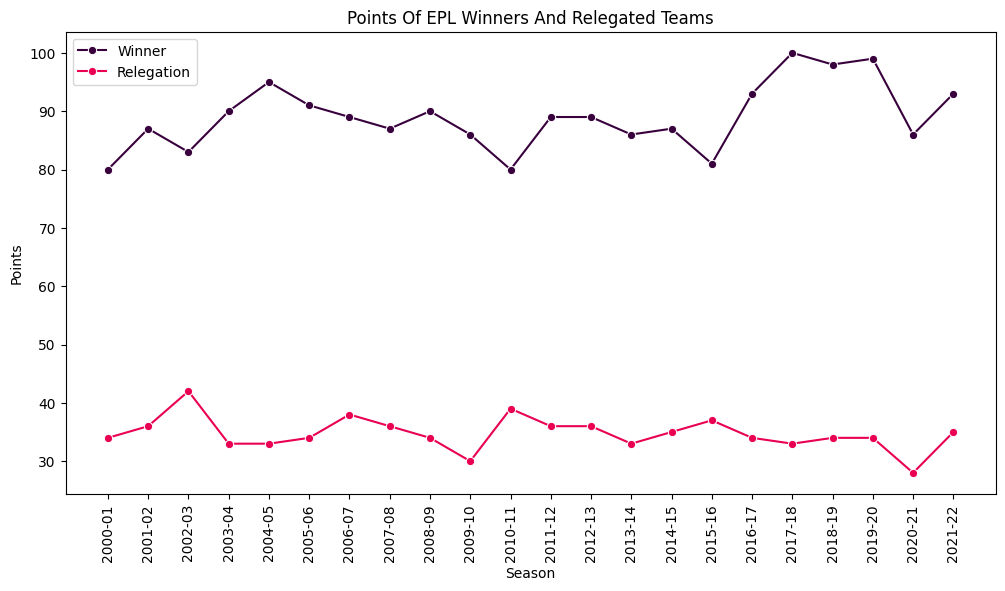

In [12]:
epl_winners = epl_condensed[epl_condensed.Pos == 1]
epl_winners = epl_winners.reset_index(drop=True)
relegation_zone = epl_condensed[epl_condensed.Pos == 18]
relegation_zone = relegation_zone.reset_index(drop=True)

plt.figure(figsize=(12,6))

sns.lineplot(x="Season", y="Pts", data=epl_winners, marker='o', color='#38003c', label='Winner')
sns.lineplot(x="Season", y="Pts", data=relegation_zone, marker='o', color='#e90052', label='Relegation')

plt.xticks(rotation = 90)
plt.title("Points Of EPL Winners And Relegated Teams")
plt.xlabel('Season')
plt.ylabel('Points')

plt.show()

Below the red line you're being relaged, upper than it you're safe.

In [15]:
print('Average Points Gap: ' + str(epl_winners.Pts.sub(relegation_zone.Pts).mean()))
print('Correlation: ' + str(epl_winners.Pts.corr(relegation_zone.Pts)))

Average Points Gap: 54.31818181818182
Correlation: -0.31466918678660794


Correlation makes sense: Teams that are top are winning more so teams on bottom have less scors (points)

- Here we can see there is a weak negative correlation `-0.3` between the amount of Pts to win the premier league vs the amount of points teams need to avoid relegation.
    - A negative correlation means that when top teams do really well, the relegation threshold is usually lower
    - why do you think this is?
- Additionally there is, on average, a 54pt gap from top to bottom.
- We can see from the gap that the _best_ relegated team is pretty much always between 30 and 40 pts (usually around 35).
- We can also clearly see that no team has won the league with less than 80pts (since 2000-01).
- It looks as though the pts needed to win the league is slowly increasing, whereas the pts to avoid relegation are staying roughly the same. 
    - There isn't _really_ enough data to make draw a conclusion on this, however.

### Bar Chart Showing Premier League + European Years for Each Team

In [19]:
epl_condensed

,Season,Team,Pos,Pts,GF,GD,Result
0,2000-01,Manchester United,1,80,79,48,Champions League
1,2000-01,Arsenal,2,70,63,25,Champions League
2,2000-01,Liverpool,3,69,71,32,Champions League
3,2000-01,Leeds United,4,68,64,21,Europa
4,2000-01,Ipswich Town,5,66,57,15,Europa
...,...,...,...,...,...,...,...
435,2021-22,Everton,16,39,43,-23,-
436,2021-22,Leeds United,17,38,42,-37,-
437,2021-22,Burnley,18,35,34,-19,Relegated
438,2021-22,Watford,19,23,34,-43,Relegated


In [24]:
#how many seasons each team played in general (they show up one time in each season)
team_counts = epl_condensed['Team'].value_counts()

# how many seasons each team played in Europa and Champions League
euro_ids = epl_condensed['Result'].isin(['Europa','Champions League'])
euro_year_counts = epl_condensed[euro_ids]['Team'].value_counts()

euro_year_counts

Manchester United          21
Chelsea                    21
Arsenal                    21
Liverpool                  19
Tottenham Hotspur          16
Manchester City            15
Everton                     6
West Ham United             5
Newcastle United            4
Blackburn Rovers            3
Southampton                 3
Leicester City              3
Ipswich Town                2
Middlesbrough               2
Bolton Wanderers            2
Leeds United                2
Aston Villa                 2
Fulham                      2
Wigan Athletic              1
Burnley                     1
Hull City                   1
Portsmouth                  1
Swansea City                1
Birmingham City             1
Stoke City                  1
Wolverhampton Wanderers     1
Name: Team, dtype: int64

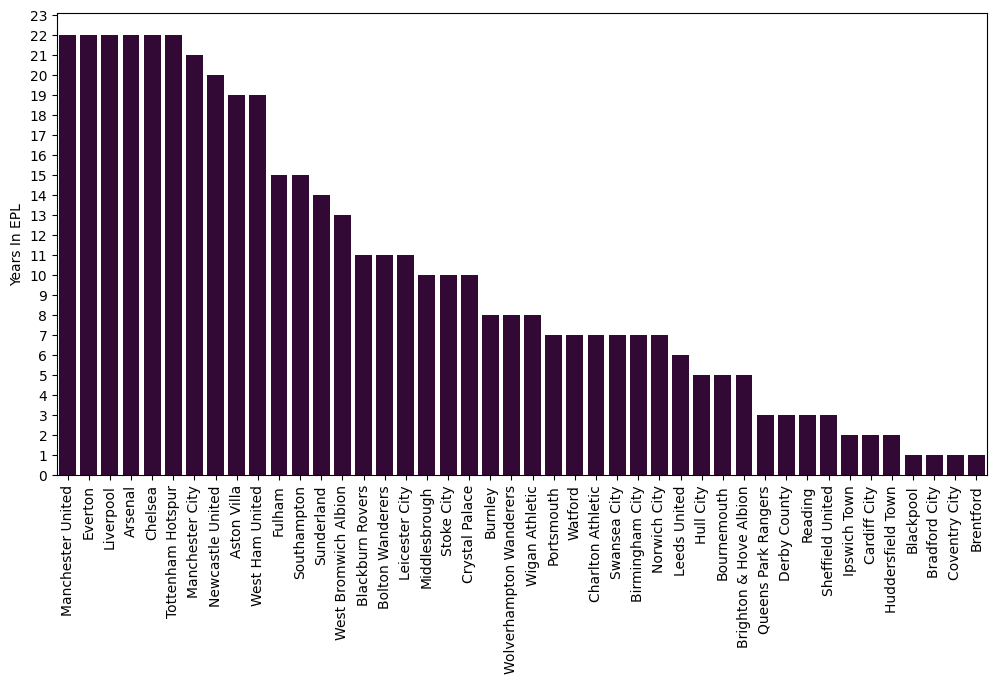

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=team_counts, color='#38003c')
plt.ylabel('Years In EPL')
plt.xticks(rotation=90)
plt.yticks(range(0,24,1))
plt.show()

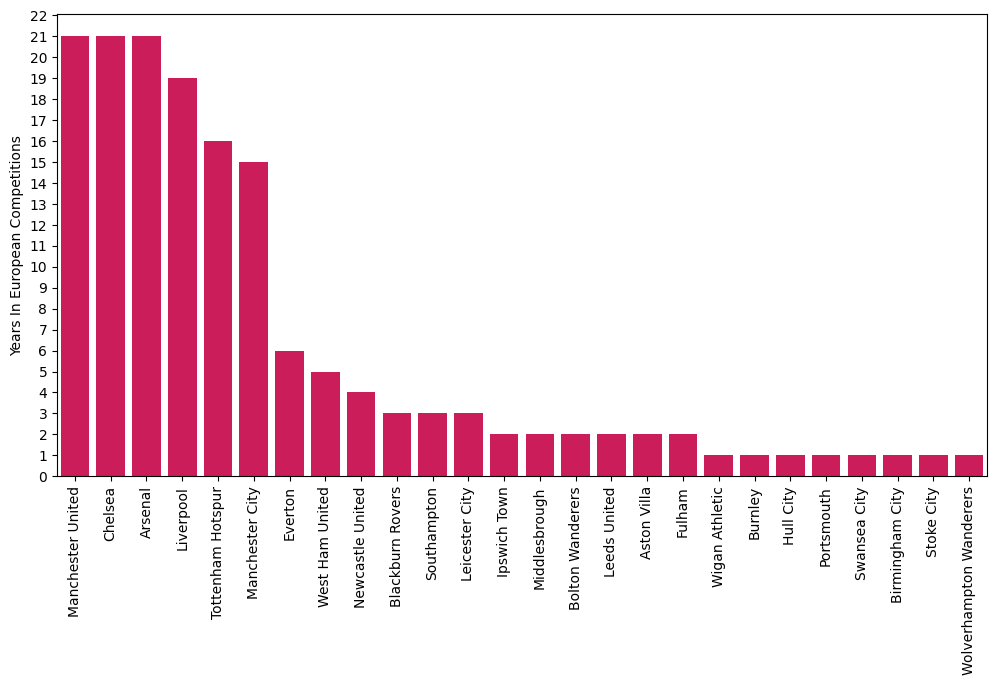

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=euro_year_counts, color='#e90052', label='Years In Europe')
plt.ylabel('Years In European Competitions')
plt.xticks(rotation=90)
plt.yticks(range(0,23,1))
plt.show()

### Examine how GD and Pts are linked

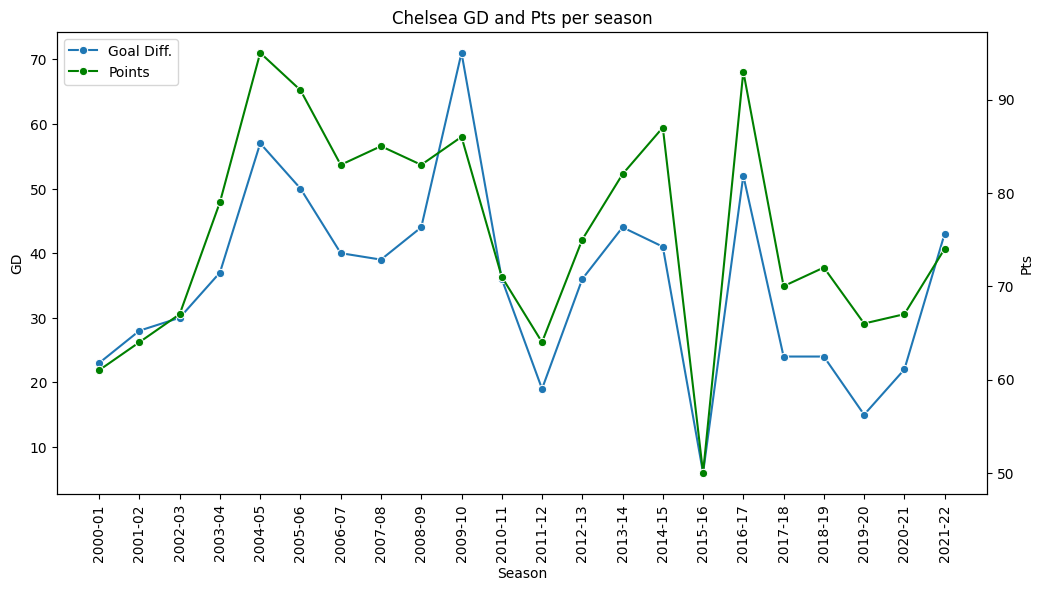

In [48]:
chelsea = epl_condensed[epl_condensed.Team == 'Chelsea']

plt.figure(figsize=(12, 6))

ax = sns.lineplot(x='Season', y='GD', data=chelsea, label='Goal Diff.', marker='o')
ax2 = ax.twinx()
sns.lineplot(x='Season', y='Pts', data=chelsea, label='Points', ax=ax2, marker='o', color='green')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='upper left')

ax2.get_legend().remove()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Chelsea GD and Pts per season")
plt.show()

Lines go roughly the same shape, there is a link between the two.

- We saw from the bar chart above, there was only one season from 2000-01 until 2021-22 that Chelsea did not qualify for a european competition
    - There is an outlier on this graph that looks like it may be the culprit!
    - Chelsea did not qualify for Europe during the 2015-16 season, however they bounced back and won the Premier League the following year
   
- As the Y-axes are independent of one another, the main purpose of this chart is to compare the shapes of the series
- We can see there is a very similar shape to both lines, which means we can reasonably assume there is fairly strong correaltion between the number of Pts a team will achieve in a season and their Goal Difference. 
- as this is only 21 data points, it may be better to test this hypothesis on a larger dataset

### Examine the wider correlation for Pts and GD

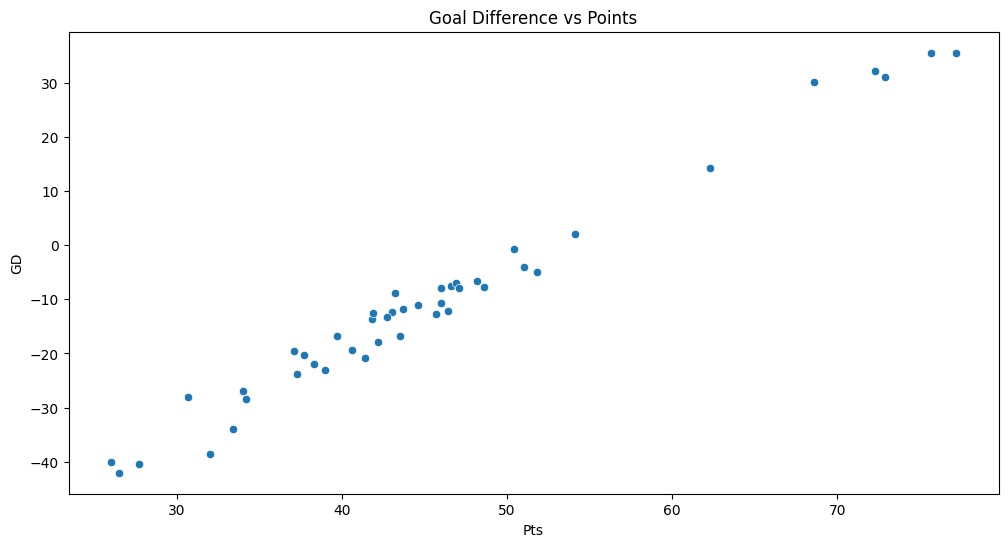

Correlation: 0.97


In [51]:
epl_team_stats = epl.groupby('Team').agg({'GD':'mean', 'Pts':'mean'}).round(1)

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Pts', y='GD', data=epl_team_stats)
ax.set_title('Goal Difference vs Points')
plt.show()

print('Correlation: ' + str(epl.GD.corr(epl.Pts).round(2)))